<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 5

## Q1: Distribution of power spectral estimates

<div style='background:#F0F0F0'>**1** You **may** use `matplotlib.mlab.psd` for the following question, but you had best use it correctly!

Using normally distributed random noise time series of length $N=2048$, show using a Monte Carlo analysis and by comparison to the theoretical probability distribution functions that:  
</div>

   1. The raw spectral estimate is indeed distributed as $\chi^2_2$.
   2. Show that block averaging with no overlap is distributed as $\chi^2_{2N_{blocks}}$.
   3. Show that block averaging with 50% overlap Hanning windows is distributed as $\chi^2_{2N_{blocks}}$.

<div style='background:#F0F0F0'>You can choose your block length, but making it an integer divisor of 2048 will make your life a lot easier.  Show that as $N_{blocks}$ is increased the variance drops (i.e. the distribution of the spectral estimates gets tighter).</div>


<div style='background:#F0F0F0'>HINT: for this time series the individual frequency estimates are indipendent samples of the distribution, so you can use them in compiling your distributions.</div>

<div style='background:#F0F0F0'>HINT: To get the pdf of the $\chi^2_\nu$ distribution correct, you need to "scale" by $\nu^{-1}$ where $\nu$ are the degrees of freedom.</div>

<div style='background:#F0F0F0'>HINT: for good presentation, make your histograms have the same bin sizes, and compare the distributions for all three cases on the same plot.</div>

In [10]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib nbagg

In [179]:
N = 2048; T = 2048.; dt = T/N
t = np.arange(N)
x = np.random.normal(0,1,N)

X = np.fft.fft(x)*dt
G = (2./T)*np.real(np.conj(X[:N/2])*X[:N/2])
f = np.fft.fftfreq(G.size,1.)
#print f.size

chi2 = np.arange(N)
for k in range(2):
    chi2 += x**2

#chi2 = stats.chi2.pdf(x, df=2) * 1./2
#print chi2.size

Nblock = int(2048./64)

chi2Nblock = np.arange(N)
for i in range(2*Nblock):
    chi2Nblock += x**2
 
block = np.zeros((Nblock, G.size))
fblock = np.zeros(G.size)
#print block[0,:].size

for i in range(Nblock):
    start = i*Nblock
    end = i*Nblock + Nblock
    tbreak = t[start:end]
    xbreak = x[start:end]
    power, fblock=mlab.psd(xbreak)
    #print power.size
    if i == 0:
        block = np.zeros((Nblock,power.size))
    block[i,:] = power

blocks = np.mean(block, axis=0)


#50% overlapping
Wblock,fWblock = mlab.psd(x,NFFT=512,Fs=1./dt,window=mlab.window_hanning,noverlap=256)

normG = (G - np.mean(G)) / np.std(G)
#normchi2 = (chi2 - np.mean(chi2)) / np.std(chi2)
normchi2 = (chi2 - np.mean(chi2)) / np.std(chi2)
normchi2Nblock = (chi2Nblock - np.mean(chi2Nblock)) / np.std(chi2Nblock)    
normblocks = (blocks - np.mean(blocks)) / np.std(blocks)
normWblock = (Wblock - np.mean(Wblock)) / np.std(Wblock)

print 'done'

done


<IPython.core.display.Javascript object>


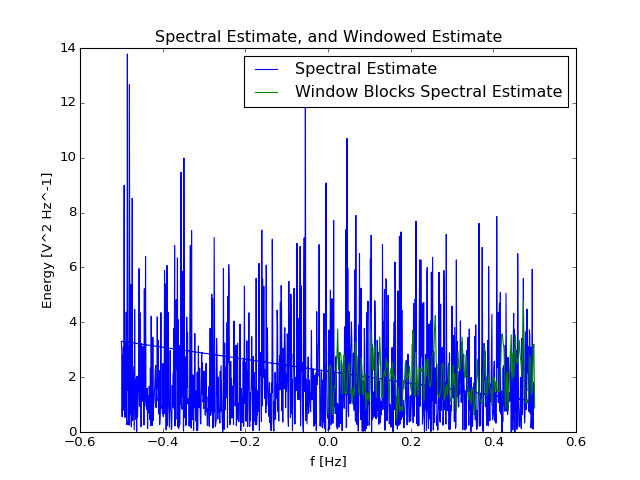

<IPython.core.display.Javascript object>


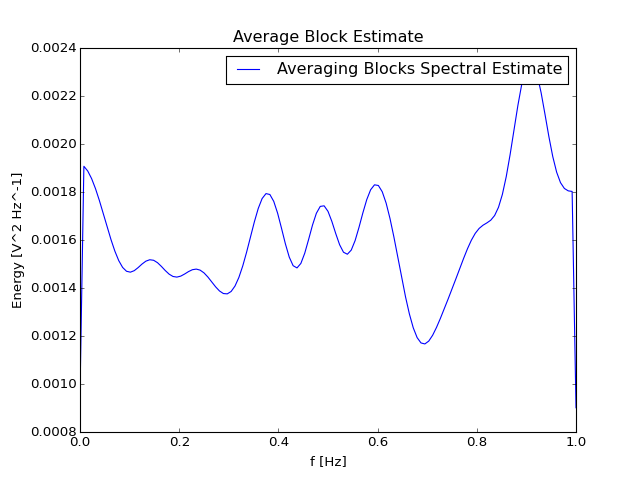

<IPython.core.display.Javascript object>


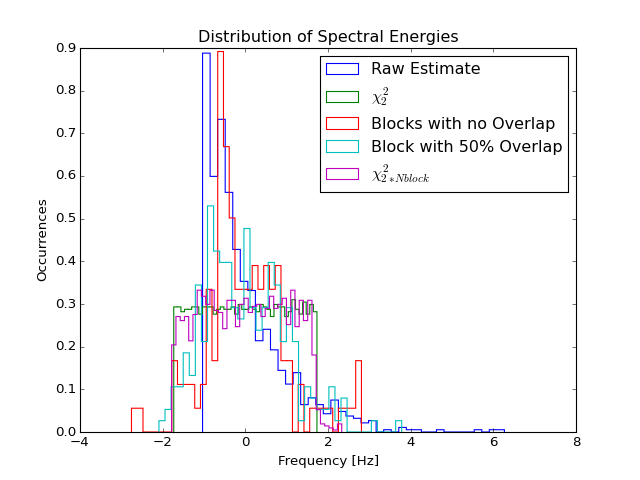

done running


In [193]:
plt.figure()
ax=plt.subplot()
ax.plot(f,G,label='Spectral Estimate')
ax.plot(fWblock,Wblock,label='Window Blocks Spectral Estimate')
ax.set_xlabel('f [Hz]')
ax.set_ylabel('Energy [V^2 Hz^-1]')
ax.set_title('Spectral Estimate, and Windowed Estimate')
ax.legend()

plt.figure()
ax=plt.subplot()
ax.plot(fblock,blocks,label='Averaging Blocks Spectral Estimate')
ax.set_xlabel('f [Hz]')
ax.set_ylabel('Energy [V^2 Hz^-1]')
ax.set_title('Average Block Estimate')
ax.legend()

bins = 40
plt.figure()
ax=plt.subplot()
ax.hist(normG,bins,label='Raw Estimate',histtype='step',normed=True)
ax.hist(normchi2,bins,label=r'$\chi_2^2$',histtype='step',normed=True)
ax.hist(normblocks,bins,label='Blocks with no Overlap',histtype='step',normed=True)
ax.hist(normWblock,bins,label='Block with 50% Overlap',histtype='step',normed=True)
ax.hist(normchi2Nblock,bins,label=r'$\chi^2_{2*Nblock}$',histtype='step',normed=True)
ax.set_title('Distribution of Spectral Energies')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Occurrences')
ax.legend()

print 'done running'

As the number of blocks increased it can clearly be seen that the distribution of the spectral estimates grew tighter.

For the various spectral estimates, the $\chi_2^2$ estimate clearly covers 95% of the raw spectral estimate, while the $\chi _{2*Nblock}^2$ clealy covers both the windowed and average spectral estimate nicely as well.

<div style='background:#F0F0F0'>**2**  For the Hanning window estimate, what fits better: $2N_{blocks}$ degrees of freedom or $18N_{blocks}/11$ degrees of freedom (the correct theoretical value)?  Its OK to evaluate by eye.</div>

<IPython.core.display.Javascript object>


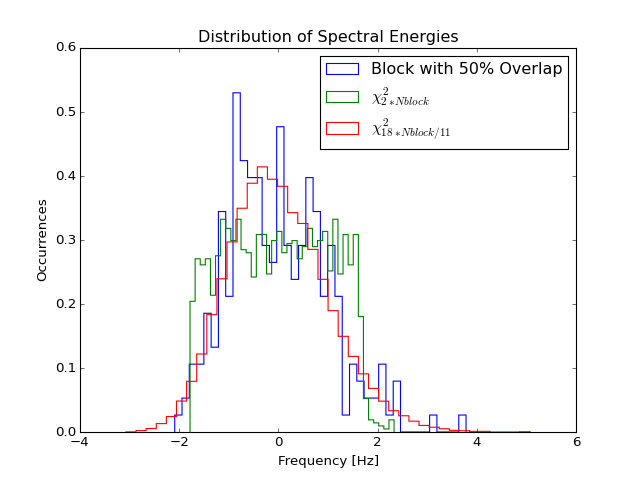

In [194]:
chi18Nblock11 = np.zeros(N)
#print 18*Nblock/11
for i in range(18*Nblock/11):
    #chi18Nblock11 += x**2
    chi18Nblock11 += np.random.normal(0,1,N)**2

normchi18Nblock11 = (chi18Nblock11 - np.mean(chi18Nblock11)) / np.std(chi18Nblock11)

bins = 40
plt.figure()
ax=plt.subplot()
ax.hist(normWblock,bins,label='Block with 50% Overlap',histtype='step',normed=True)
ax.hist(normchi2Nblock,bins,label=r'$\chi^2_{2*Nblock}$',histtype='step',normed=True)
ax.hist(normchi18Nblock11,bins,label=r'$\chi^2_{18*Nblock/11}$',histtype='step',normed=True)
ax.set_title('Distribution of Spectral Energies')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Occurrences')
ax.legend()

The $18*Nblock/11$ has an overall better fit to the Window Block with 50% overlap. It follows the overlap extimate a little bit more on both sides and is higher too, so it covers more and has a better fit than the $2*Nblock$.

## Q2: Spectra of a "red-noise" signal

<div style='background:#F0F0F0'> **1** Load in the Deep Cove hourly data, and compute the power spectra using some reasonable value for $N_{FFT}$, and comment on the effect of applying the Hanning window to not applying it to the spectral leakage.</div>

In [166]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
dc=dc[np.isfinite(dc)]

<IPython.core.display.Javascript object>


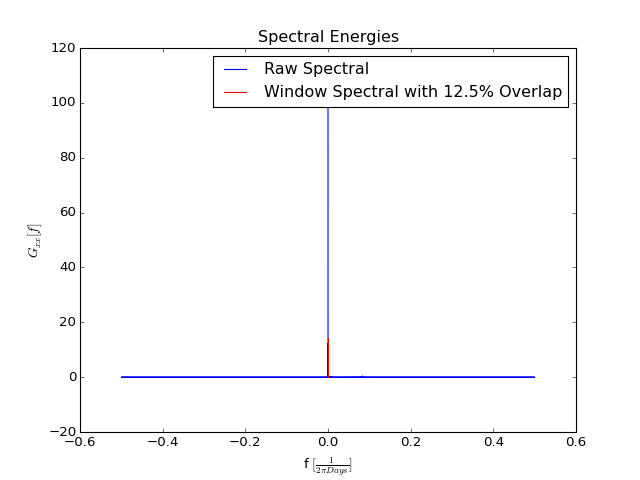

In [187]:
N = dc.size
t = np.arange(N)
dt = 60*60*24 # 1 day
T = N*dt

DC = dt*np.fft.fft(dc)
GDC = (2./T)*np.real(np.conj(DC[:N/2])*DC[:N/2])
fGDC = np.fft.fftfreq(GDC.size, 1.)

#12.5% Overlapping
Nfft = 512
over = 512/8
WDC,fWDC = mlab.psd(dc,NFFT=Nfft,Fs=1./dt,window=mlab.window_hanning,noverlap=over)

normGDC = (GDC - np.mean(GDC)) / np.std(GDC)
normWDC = (WDC - np.mean(WDC)) / np.std(WDC)

plt.figure()
ax=plt.subplot()
ax.plot(fGDC,normGDC,label='Raw Spectral')
ax.plot(fWDC,normWDC,label='Window Spectral with 12.5% Overlap', color='red')
ax.set_title('Spectral Energies')
ax.set_xlabel(r'f $[\frac{1}{2 \pi Days}]$')
ax.set_ylabel(r'$G_{xx} [f]$')
ax.legend()

<div style='background:#F0F0F0'> **2** Now do the same thing to the intergal of the Deep Cove data with time: $$y(t)=\int_o^t x(t')\ \mathrm{d}t'$$  This is obviously a silly thing to do, but compare the spectra and comment on the difference between the Hanning window and the non-Hanning windowed data.  </div>

<IPython.core.display.Javascript object>


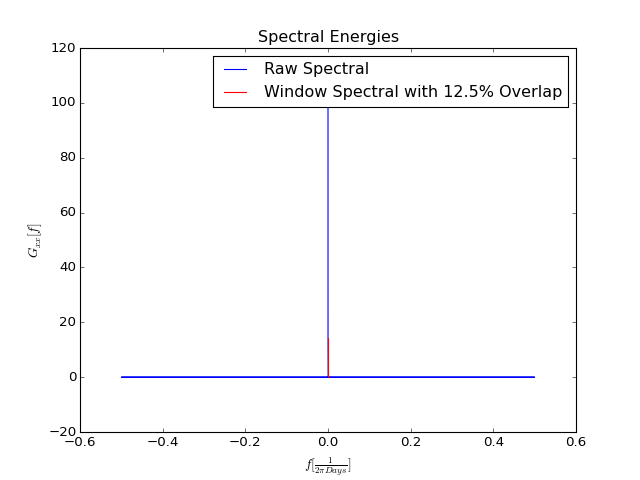

In [191]:
ddc = np.cumsum(dc)
#dddc = np.sum(dc*dt)

DC = dt*np.fft.fft(ddc)
GDC = (2./T)*np.real(np.conj(DC[:N/2])*DC[:N/2])
fGDC = np.fft.fftfreq(GDC.size, 1.)

#12.5% Overlapping
Nfft = 512
over = 512/8
WDC,fWDC = mlab.psd(dc,NFFT=Nfft,Fs=1./dt,window=mlab.window_hanning,noverlap=over)

normGDC = (GDC - np.mean(GDC)) / np.std(GDC)
normWDC = (WDC - np.mean(WDC)) / np.std(WDC)

plt.figure()
ax=plt.subplot()
ax.plot(fGDC,normGDC,label='Raw Spectral')
ax.plot(fWDC,normWDC,label='Window Spectral with 12.5% Overlap', color='red')
ax.set_title('Spectral Energies')
ax.set_xlabel(r'$f [\frac{1}{2 \pi Days}]$')
ax.set_ylabel('$G_{xx} [f]$')
ax.legend()

The only differnce that can be seen is that the Hanning window does not reach as high as the non-Hanning window when f = 0. A lower value for $G_{xx}$ is diue to the fact that when a window is taken, the variance is dropped which tightens the spectral estimate. It should also be noted that the windowed one allows only positive values of f, and not many at that. Since $G_{xx}$ is symmetric, it can also be graphed with on;y positive values of f too. The window greatly reduces the variance of the spectral which leads to a more accurate power spectrum.